# Housing Prices Prediction

---





## 1. Data Collection

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We can import the other libraries later depending on the need

In [2]:
# Load the dataset
data = pd.read_csv('HousingData.csv')

In [3]:
# Display the first few rows of the dataset
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## 2. Data Preprocessing

In [4]:
# Check for missing values
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
# Drop rows with missing values
data.dropna(inplace=True)

# Display the shape of the dataset after dropping missing values
data.shape

(394, 14)

In [6]:
# Rename the target variable column'MEDV' to a more meaningful
data.rename(columns={'MEDV':'PRICE'}, inplace=True)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


## 3. Exploratory Data Analysis and Visualization

In [7]:
# Get info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  PRICE    394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [8]:
# Get a basic statistical summary of the dataset
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


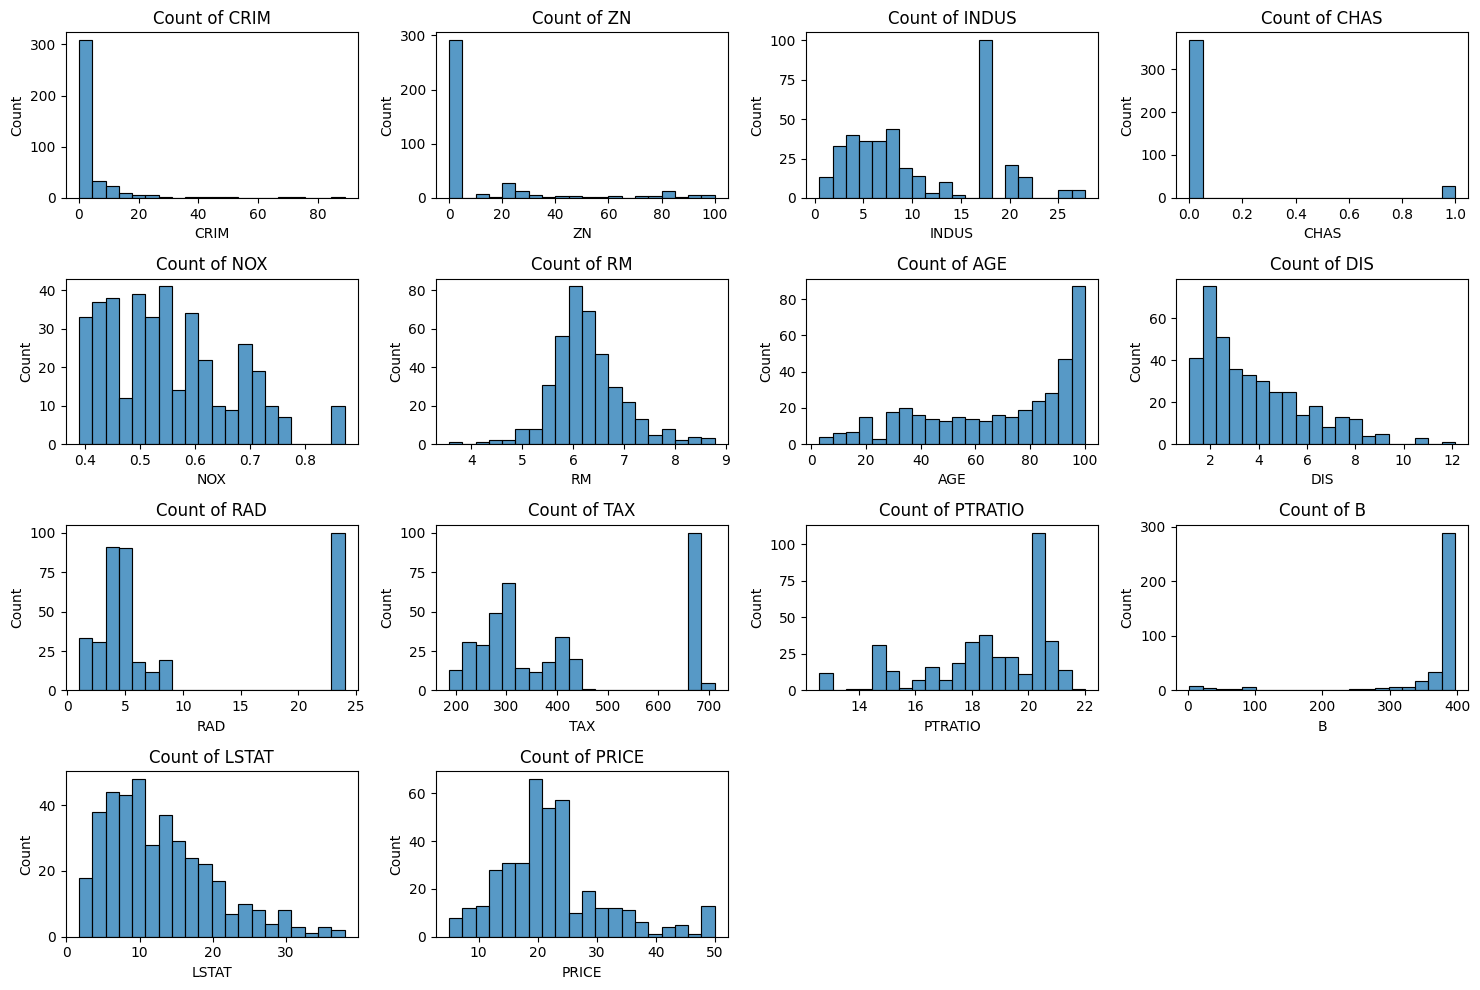

In [9]:
# List of features for which to create histograms
features_for_histograms = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

# Create histograms for the features
plt.figure(figsize=(15, 10))
for feature in features_for_histograms:
    plt.subplot(4, 4, features_for_histograms.index(feature) + 1)
    sns.histplot(data[feature], bins=20)
    plt.title(f'Count of {feature}')
plt.tight_layout()
plt.show()

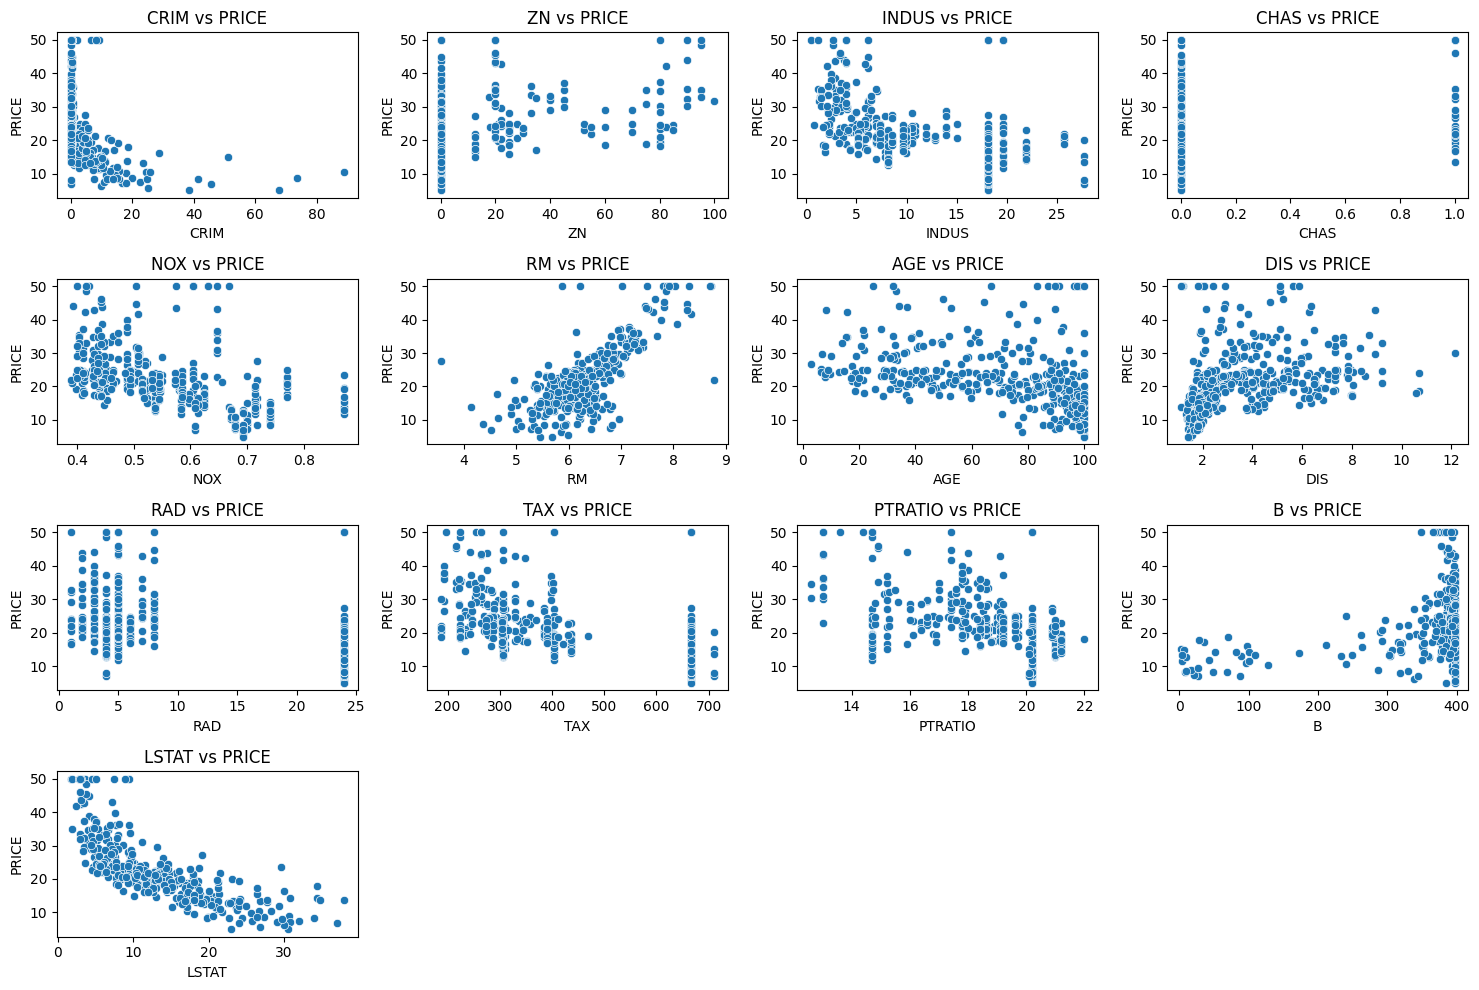

In [10]:
# List of features for which to create scatter plots
features_for_scatter = ['CRIM', 'ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Create scatter plots for the features against the target variable (PRICE)
plt.figure(figsize=(15, 10))
for feature in features_for_scatter:
    plt.subplot(4, 4, features_for_scatter.index(feature) + 1)
    sns.scatterplot(x=feature, y='PRICE', data=data)
    plt.title(f'{feature} vs PRICE')
plt.tight_layout()
plt.show()


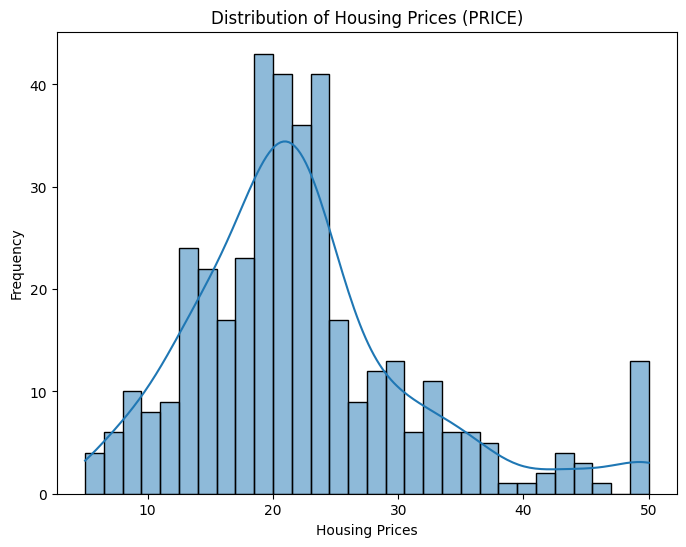

In [11]:
# Show the distribution of the target variable (PRICE)
plt.figure(figsize=(8, 6))
sns.histplot(data['PRICE'], bins=30, kde=True)
plt.title('Distribution of Housing Prices (PRICE)')
plt.xlabel('Housing Prices')
plt.ylabel('Frequency')
plt.show()

<Axes: >

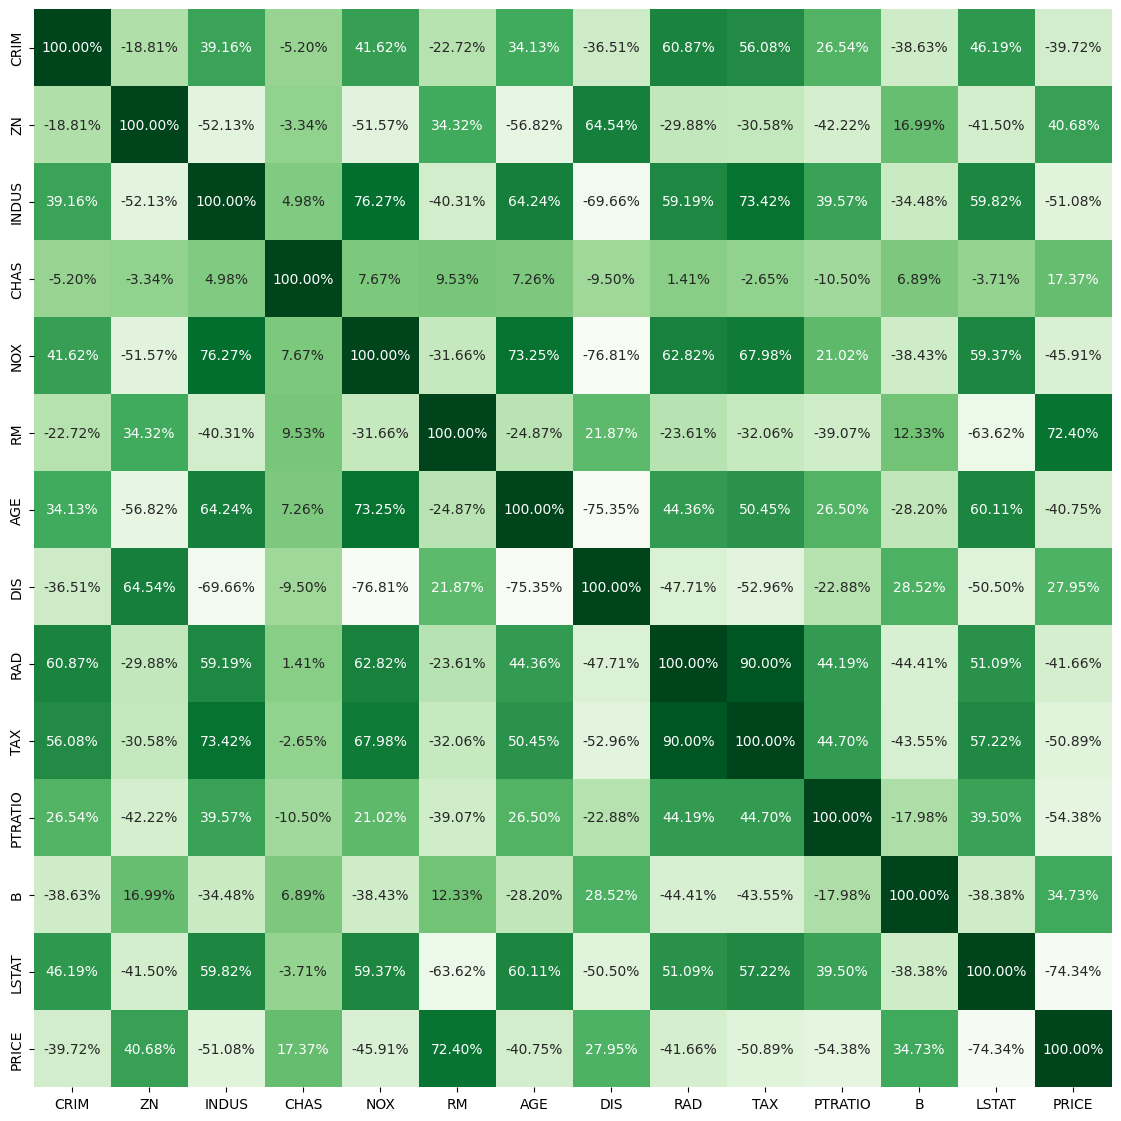

In [12]:
# Create a correlation matrix
corr = data.corr()

# Plotting the heatmap of correlation between features
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')

## 4. Feature Selection

In [13]:
  from sklearn.feature_selection import SelectKBest
  from sklearn.feature_selection import chi2
  from sklearn import model_selection
  from sklearn.metrics import mean_squared_error, r2_score

  X = data.iloc[:,0:13] #independent columns
  y = data.iloc[:,-1] #target column i.e price range

  y = np.round(data['PRICE'])

  #Apply SelectKBest class to extract top 5 best features
  bestfeatures = SelectKBest(score_func=chi2)
  fit = bestfeatures.fit(X,y)
  scores = pd.DataFrame(fit.scores_)
  columns = pd.DataFrame(X.columns)

  # Concat the dataframes for better visualization
  featureScores = pd.concat([columns,scores],axis=1)
  featureScores.columns = ['FEATURE','SCORE']
  featureScores

,FEATURE,SCORE
0,CRIM,5044.573637
1,ZN,5880.118440
2,INDUS,703.365351
3,CHAS,50.407501
4,NOX,3.883311
5,RM,18.075884
6,AGE,1896.265363
7,DIS,132.055576
8,RAD,1163.745035
9,TAX,12242.485632


In [49]:
# Print 5 best features
featureScores.nlargest(5,'SCORE')

,FEATURE,SCORE
9,TAX,12242.485632
1,ZN,5880.118440
0,CRIM,5044.573637
11,B,2709.416310
6,AGE,1896.265363


## 5. Model Building

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [17]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15)

lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [18]:
# Create a list of models and evaluate each model
models = [
        ('Linear Regression', lr),
        ('Decision Tree', dt),
        ('Random Forest', rf)
    ]

In [19]:
# Model Evaluation

import math

print("Root Mean Square Error (RMSE) score\n")
scoring = 'neg_mean_squared_error'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  sqrt_cv_results = [math.sqrt(abs(i)) for i in cv_results]
  print("{}: {} ({})".format(name, np.mean(sqrt_cv_results), np.std(sqrt_cv_results)))
  print('Result from each iteration of cross validation:', cv_results, '\n')

Root Mean Square Error (RMSE) score

Linear Regression: 4.207193176153652 (0.8873597348757993)
Result from each iteration of cross validation: [-18.92660202  -8.84076947 -23.36880313 -19.46565597 -17.19764542
 -10.63284886 -11.14331842 -21.74812681 -38.34080273 -15.21424438] 

Decision Tree: 4.8106825029221385 (1.6000302432860278)
Result from each iteration of cross validation: [-20.97058824  -9.47058824 -18.70588235 -13.94117647 -12.36363636
 -15.87878788 -12.66666667 -42.75757576 -45.39393939 -64.87878788] 

Random Forest: 3.3693934958348857 (1.1633193838934133)
Result from each iteration of cross validation: [ -7.45409118  -6.67269412  -5.42112647  -8.83539706  -6.27464545
  -7.77599394  -8.37353939 -29.55397879 -32.78105152 -13.91872727] 



In [21]:
print("R-squared Value\n")
scoring = 'r2'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  print("{}: {} ({})".format(name, cv_results.mean(), cv_results.std()))
  print('Result from each iteration of cross validation:', cv_results, '\n')

R-squared Value

Linear Regression: 0.7193748187505382 (0.16674022307078534)
Result from each iteration of cross validation: [0.79032642 0.79907511 0.6891918  0.75925665 0.79898221 0.84918726
 0.84889419 0.64217329 0.25423229 0.76242897] 

Decision Tree: 0.7573292312173784 (0.1393496070652245)
Result from each iteration of cross validation: [0.76066997 0.82900854 0.82759273 0.87009791 0.87106163 0.91719377
 0.8240701  0.61263567 0.4826387  0.5783233 ] 

Random Forest: 0.8533106204886989 (0.10274398752762376)
Result from each iteration of cross validation: [0.88934978 0.89301686 0.89472748 0.94235659 0.95044402 0.93763169
 0.88431674 0.69916116 0.62942752 0.81267437] 



RMSE score: 6.320472204729113
R2 score: 0.6475627658784286


Text(0, 0.5, 'Predicted Price')

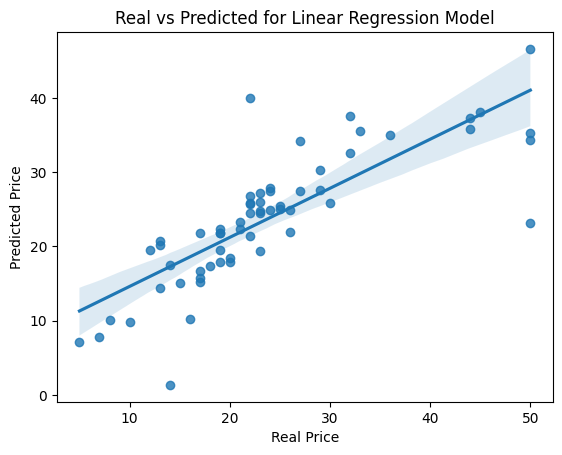

In [20]:
# Model Testing
model1 = lr
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
rsquared_score = r2_score(y_test, y_pred)
print('RMSE score:', rmse_score)
print('R2 score:', rsquared_score)
sns.regplot(x=y_test, y=y_pred)
plt.title("Real vs Predicted for Linear Regression Model")
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")

In [21]:
print("Training Accuracy:",model1.score(X_train,y_train)*100)
print("Testing Accuracy:",model1.score(X_test,y_test)*100)
print("Model Accuracy:",r2_score(y,model1.predict(X))*100)

Training Accuracy: 78.95577015105012
Testing Accuracy: 64.75627658784286
Model Accuracy: 76.12775255799717


RMSE score: 4.708148963941845
R2 score: 0.8044386064657791


Text(0, 0.5, 'Predicted Price')

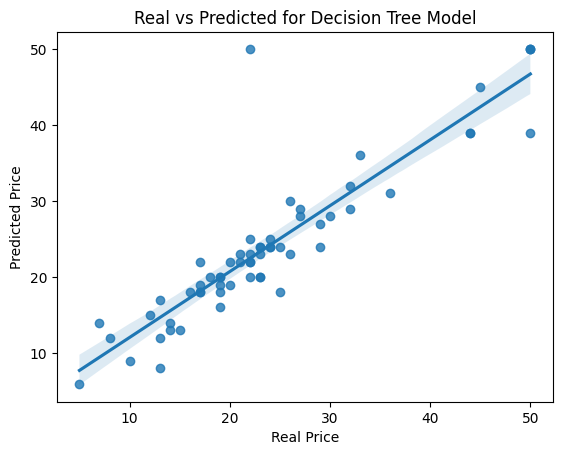

In [22]:
model2 = dt
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
rsquared_score = r2_score(y_test, y_pred)
print('RMSE score:', rmse_score)
print('R2 score:', rsquared_score)
sns.regplot(x=y_test, y=y_pred)
plt.title("Real vs Predicted for Decision Tree Model")
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")

In [23]:
print("Training Accuracy:",model2.score(X_train,y_train)*100)
print("Testing Accuracy:",model2.score(X_test,y_test)*100)
print("Model Accuracy:",r2_score(y,model2.predict(X))*100)

Training Accuracy: 100.0
Testing Accuracy: 80.44386064657792
Model Accuracy: 95.96340239837156


RMSE score: 4.1898713186286125
R2 score: 0.8451240074891682


Text(0, 0.5, 'Predicted Price')

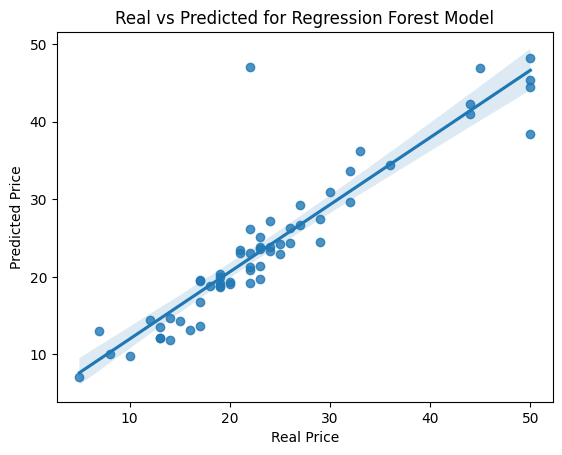

In [24]:
model3 = rf
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)

rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
rsquared_score = r2_score(y_test, y_pred)
print('RMSE score:', rmse_score)
print('R2 score:', rsquared_score)
sns.regplot(x=y_test, y=y_pred)
plt.title("Real vs Predicted for Regression Forest Model")
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")

In [25]:
print("Training Accuracy:",model3.score(X_train,y_train)*100)
print("Testing Accuracy:",model3.score(X_test,y_test)*100)
print("Model Accuracy:",r2_score(y,model3.predict(X))*100)

Training Accuracy: 97.36764830632232
Testing Accuracy: 84.51240074891682
Model Accuracy: 94.72705962728374


Hence, the decision tree model works the best on our dataset with an accuracy of 95.96% followed closesly by the Random Forest Model. Now let's experiment with Hyperparameter Tuning to see if we can improve the model further.

## 6. Hyperparameter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
hyperparameters = {
    'criterion': ["squared_error"],
    'max_depth': [5, 6, 7],
    'min_samples_split': [20, 30, 40],
    'min_samples_leaf': [10, 15, 20],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [42]
}

# Create the grid search object
grid_search = GridSearchCV(dt, hyperparameters, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)


{'criterion': 'squared_error', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 30, 'random_state': 42}


RMSE score: 5.250840969573281
R2 score: 0.756756937293172


Text(0, 0.5, 'Predicted Price')

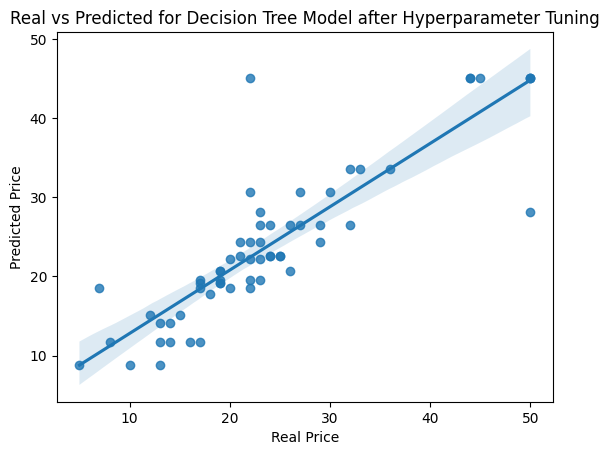

In [47]:
# Applying the hyperparameters to a new Decision Tree model
best_model= DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=7,
    max_features=None,
    min_samples_leaf=10,
    min_samples_split=30,
    random_state=42
)


best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
rsquared_score = r2_score(y_test, y_pred)
print('RMSE score:', rmse_score)
print('R2 score:', rsquared_score)
sns.regplot(x=y_test, y=y_pred)
plt.title("Real vs Predicted for Decision Tree Model after Hyperparameter Tuning")
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")

In [48]:
print("Training Accuracy:",model2.score(X_train,y_train)*100)
print("Testing Accuracy:",model2.score(X_test,y_test)*100)
print("Model Accuracy:",r2_score(y,best_model.predict(X))*100)

Training Accuracy: 100.0
Testing Accuracy: 80.44386064657792
Model Accuracy: 84.92777110074613


There are a few possible explanations for why the accuracy has decreased after hyperparameter tuning. One possibility is that the model has become overfit to the training data. This can happen if the model is too complex or if the hyperparameters are tuned too aggressively. Another possibility is that the dataset is too small to train a complex model. Finally, the data may contain noise, which can also lead to overfitting.

To conclude, our best model is the simple Decision Tree Regressor with an accuracy of 95.96%

## 7. Visualizing the relationship between the features and  the predicted price

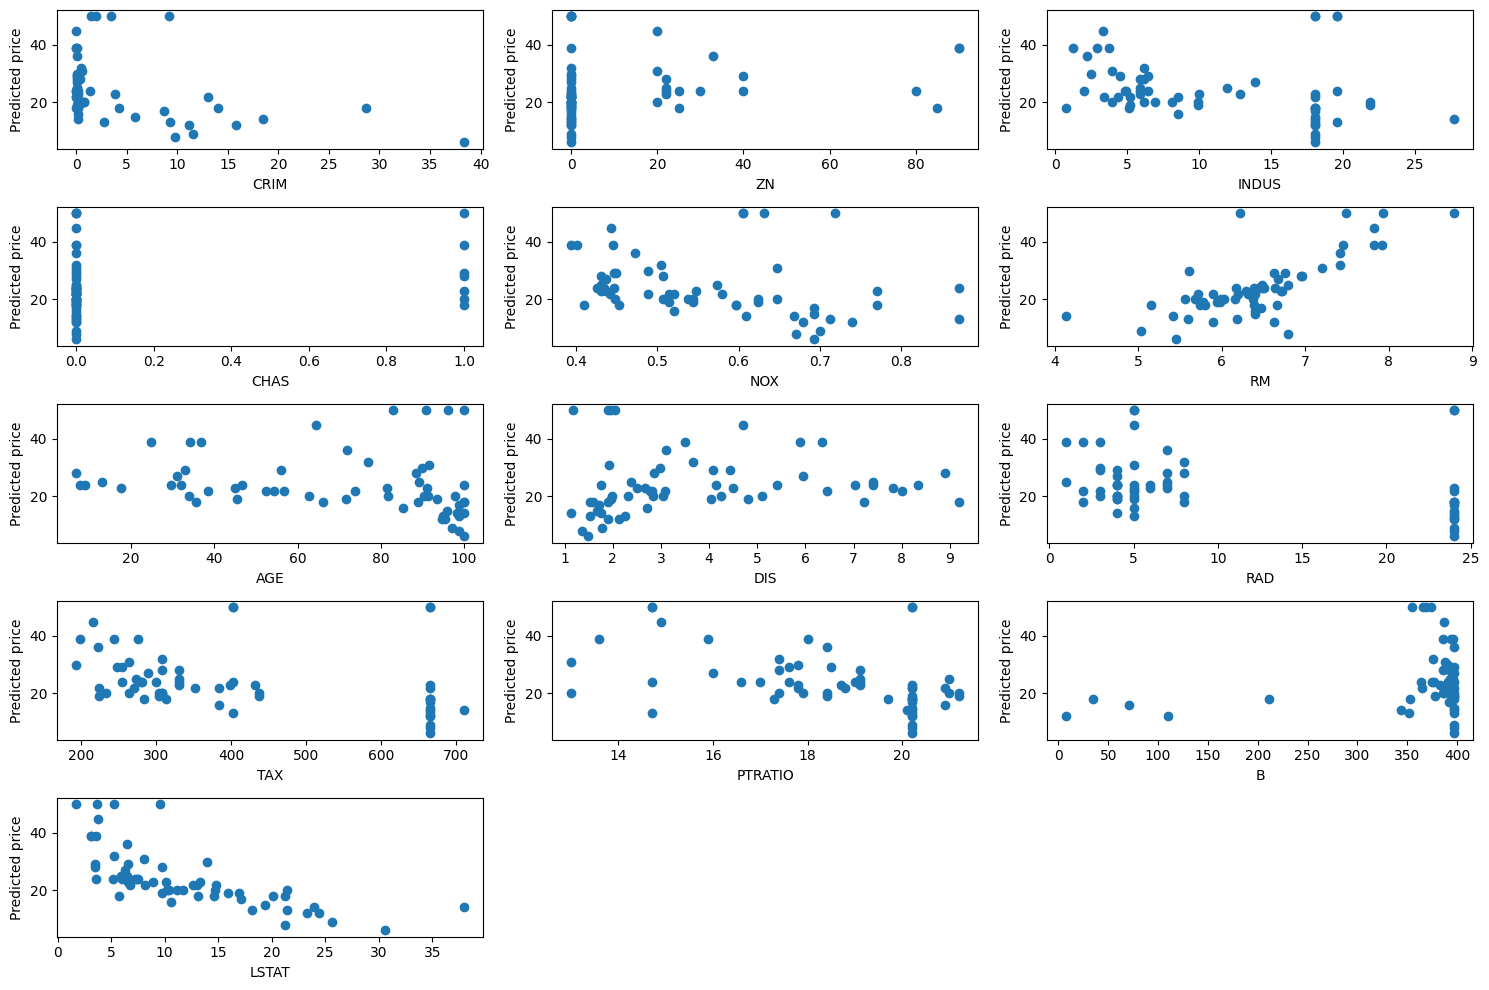

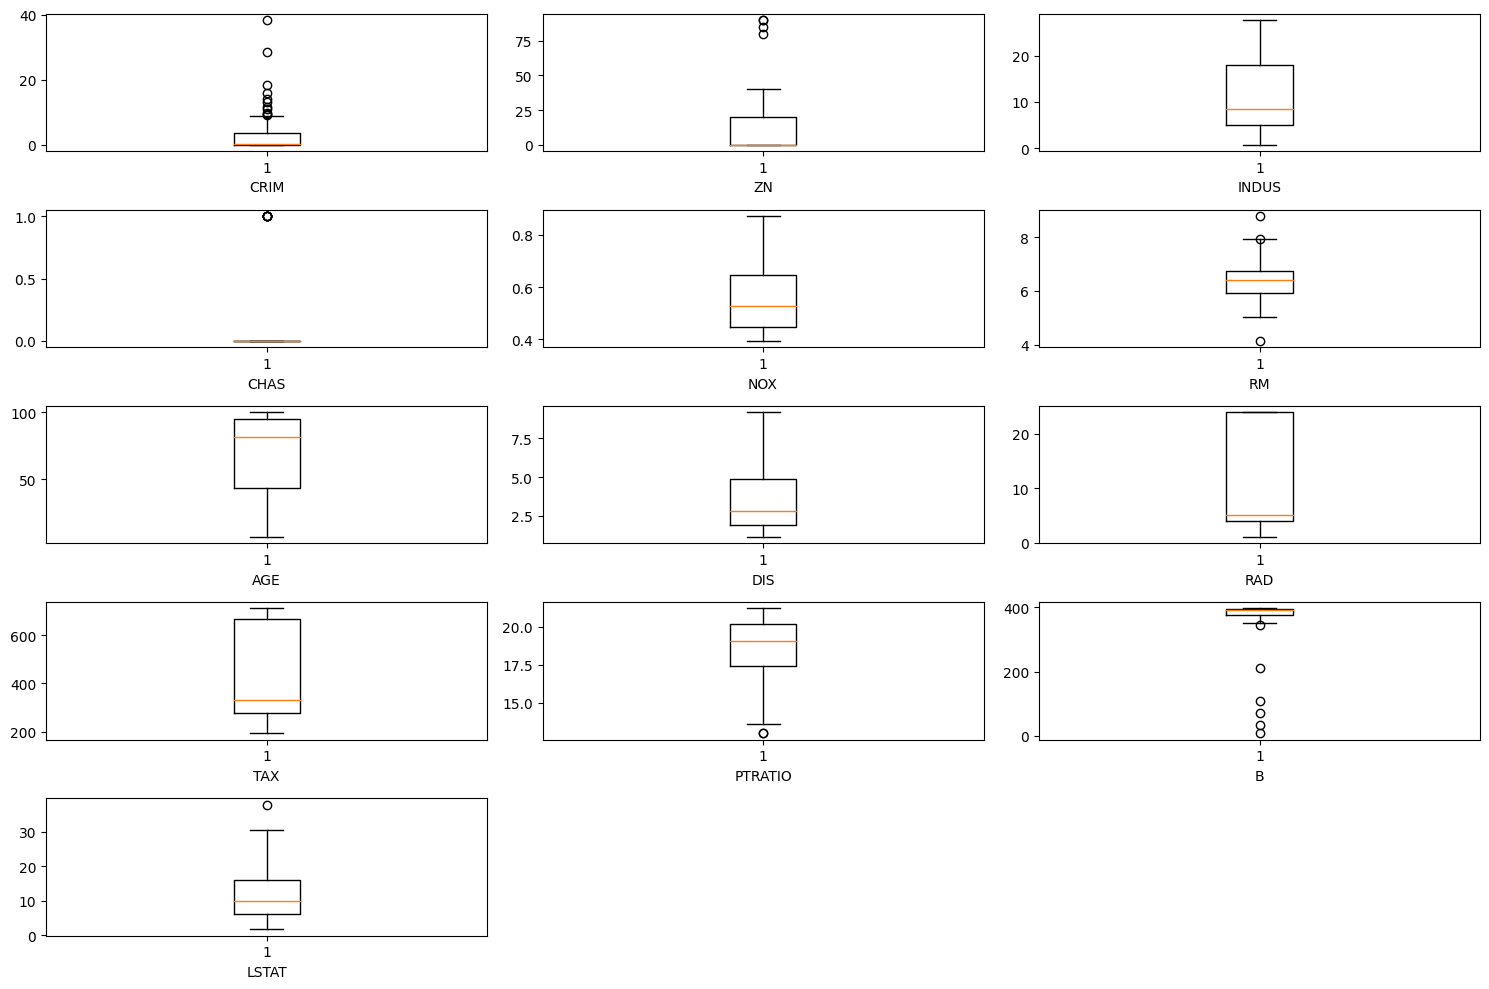

In [60]:
# Create the predicted prices using your model
predicted_prices = model2.predict(X_test)

# Determine the number of rows and columns dynamically based on the number of features
num_features = len(X_test.columns)
num_rows = math.ceil(num_features / 3)
num_cols = min(num_features, 3)

# Create the scatter plots to see the relationship between each feature and predicted prices
plt.figure(figsize=(15, 10))

for i, feature in enumerate(X_test.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.scatter(x=X_test[feature], y=predicted_prices)
    plt.xlabel(feature)
    plt.ylabel("Predicted price")

plt.tight_layout()
plt.show()

# Create the box plots to see the spread and central tendency of each feature
plt.figure(figsize=(15, 10))

for i, feature in enumerate(X_test.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.boxplot(X_test[feature])
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


## 8. Saving the model

In [61]:
import pickle

# Save the model to a file
with open("model.pkl", "wb") as file:
    pickle.dump(model2, file)

We can use this saved model to further deploy it as an app using Flask or Streamlit.